# The Battle of the Neighborhoods - Week 2

### Part 1 Download and Explore New York city geographical coordinates dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the web. Link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

First, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1  anaconda --> 2019.6.16-py36_1  conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.0.2s-h7b6447c_0 anaconda --> 1.0.2r-h14c3975_0 conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A new

The json file is downloaded and it is placed on the server. So run a wget command and access the data.

In [2]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


##### Load and explore the data

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

All the relevant data is in the features key, which is basically a list of the neighborhoods. So, define a new variable that includes this data.

In [4]:
neighborhoods_data = newyork_data['features']

Take a look at the first item in this list.

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

##### Tranform the data into a pandas dataframe

The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. Start by creating an empty dataframe.

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then loop through the data and fill the dataframe one row at a time.

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Let's make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

Use geopy library to get the latitude and longitude values of New York City.

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


##### Create a map of New York with neighborhoods superimposed on top.

In [13]:
# create map of Toronto using latitude and longitude values
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

### Part 2 Web scrapping of Population and Demographics data of New York city from Wikipedia

#### A : POPULATION DATA

Web scrapping of Population data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City

##### Download all the dependencies that is needed.

In [14]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c anaconda beautifulsoup4 --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         156 KB  anaconda

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1  conda-forge --> 2019.6.16-py36_1  anaconda
    openssl: 1.0.2r-h14c3975_0 conda-forge --> 1.0.2s-h7b6447c_0 anaconda


certifi-2019.6.16    | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


### Web scrapping of Population data from wikipedia page using BeautifulSoup.

Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

In [15]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url)
table = soup.find('table',{'class':'wikitable sortable'})


In [16]:
cols=[]
rows = table.find_all('tr')
for row in rows:
    col=row.find_all('td')
    col=[x.text.strip() for x in col]
    cols.append(col)

In [17]:
Pop_data = pd.DataFrame(cols)

In [18]:
Pop_data = Pop_data.loc[3:,[0,1,2,5,6,7,8]].reset_index(drop=True)

In [19]:
Pop_data

,0,1,2,5,6,7,8
0,The Bronx,Bronx,"1,471,160",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,648,771",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,664,727",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,358,582",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"479,458",58.37,151.18,"8,112","3,132"
5,City of New York,"8,622,698",806.863,783.83,"28,188","10,947",None
6,State of New York,"19,849,399","1,547.116","122,284",416.4,159,None
7,Sources:[14] and see individual borough articles,None,None,None,None,None,None


In [20]:
Pop_data.columns=['Borough','County','Estimate_2017','square_miles','square_km','persons_sq_mi','persons_sq_km']

In [21]:
Pop_data

,Borough,County,Estimate_2017,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,471,160",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,648,771",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,664,727",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,358,582",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"479,458",58.37,151.18,"8,112","3,132"
5,City of New York,"8,622,698",806.863,783.83,"28,188","10,947",None
6,State of New York,"19,849,399","1,547.116","122,284",416.4,159,None
7,Sources:[14] and see individual borough articles,None,None,None,None,None,None


Save dataframe as csv file

In [22]:
Pop_data.to_csv('BON2_POPULATION.csv',index=False)

##### B : DEMOGRAPHICS DATA

We will web scrap Demographics data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City

##### Web scrapping of Demographics data from wikipedia page using BeautifulSoup.

In [23]:
website_url2 = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup2 = BeautifulSoup(website_url2)
table2 = soup2.find('table',{'class':'wikitable collapsible collapsed','style':'font-size: 90%;'})

In [24]:
cols2=[]
rows2 = table2.find_all('tr')
for row in rows2:
    col2=row.find_all('td')
    col2=[x.text.strip() for x in col2]
    cols2.append(col2)

In [25]:
Demo_data = pd.DataFrame(cols2)

In [26]:
Demo_data = Demo_data.loc[1:,:].reset_index(drop=True)
Demo_data

,0,1,2,3,4
0,White,44.0%,52.3%,76.6%,93.6%
1,—Non-Hispanic,33.3%,43.2%,62.9%[273],92.0%
2,Black or African American,25.5%,28.7%,21.1%,6.1%
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[273],1.6%
4,Asian,12.7%,7.0%,1.2%,−


In [27]:
Demo_data.columns=['Racialcomposition','2010','1990','1970','1940']

In [28]:
Demo_data

,Racialcomposition,2010,1990,1970,1940
0,White,44.0%,52.3%,76.6%,93.6%
1,—Non-Hispanic,33.3%,43.2%,62.9%[273],92.0%
2,Black or African American,25.5%,28.7%,21.1%,6.1%
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[273],1.6%
4,Asian,12.7%,7.0%,1.2%,−


In [29]:
Demo_data.to_csv('BON2_DEMOGRAPHICS.csv',index=False)

### Part 3 Download and Explore New York city and its Boroughs Cuisine dataset

##### Download all the dependencies that is need.

In [30]:
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.1.1
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         473 KB

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0      conda-forge

The following packages will be UPDATED:

    certifi:   2019.6.16-py36_1  anaconda    --> 2019.6.16-py36_1  

This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [31]:
NYC_CUISINE=pd.read_csv('NYC_CUISINE.csv')
NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [32]:
NYC_CUISINE.shape

(56, 3)

In [33]:
print(NYC_CUISINE.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [34]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,13
Manhattan,12
The Bronx,9
Staten Island,3


### 1. NEW YORK CITY CUISINE - WORD CLOUD

In [35]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [36]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [37]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

##### Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [39]:
stopwords = set(STOPWORDS)

In [40]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

The word cloud is created, let's visualize it.

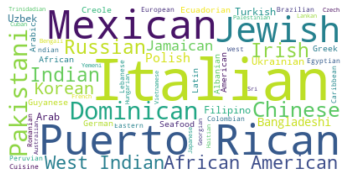

<Figure size 2160x3240 with 0 Axes>

In [41]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

##### Most Preferred Food in New York City -

1. Italian
2. Mexican
3. Purto Ricon
4. Jewish
5. Indian
6. Pakistani
7. Dominican

### 2. BROOKLYN CUISINE - WORD CLOUD`

In [42]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukra..."


In [43]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukra..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [44]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [45]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [46]:
stopwords = set(STOPWORDS)

In [47]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

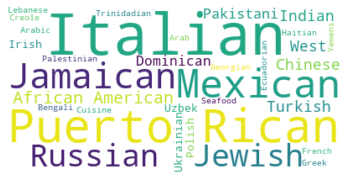

<Figure size 2160x3240 with 0 Axes>

In [48]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

##### Most Preferred Food in Brooklyn is -

1. Italian
2. Purto Rican
3. Mexican

### 3. QUEENS CUISINE - WORD CLOUD

In [49]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills,"Jewish, Russian and Uzbek"
4,Queens,Howard Beach,Italian


In [50]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,Italian
5,German and Polish
6,"ndian, Pakistani, Bangladeshi, Colombian, Ecua..."
7,"Bangladeshi, Caribbean, African-American, Afr..."
8,"Arab, Chinese, and Italian"
9,"Indian, Guyanese, West Indian, Pakistani, Bang..."


In [51]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [52]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [53]:
stopwords = set(STOPWORDS)

In [54]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

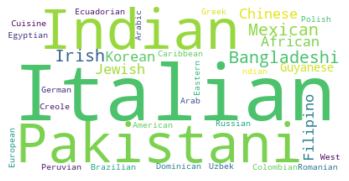

<Figure size 2160x3240 with 0 Axes>

In [55]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

##### Most Preferred Food in Queens is -

1. Indian
2. Irish
3. Pakistani
4. Mexican

### 4. MANHATTAN CUISINE - WORD CLOUD

In [56]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()


,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,Chinese and Vietnamese
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
3,Manhattan,Greenwich Village,Italian
4,Manhattan,Harlem,"Italian, African-American, Latin American, Wes..."


In [57]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian
4,"Italian, African-American, Latin American, Wes..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin American"
9,"Indian, Pakistani and Bangladeshi"


In [58]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [59]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [60]:
stopwords = set(STOPWORDS)

In [61]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

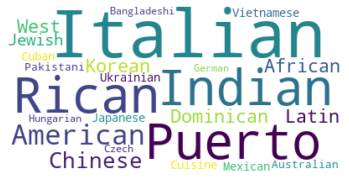

<Figure size 2160x3240 with 0 Axes>

In [62]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

##### Most Preferred Food in Manhattan is -

1. Italian
2. American
3. Puerto Rican
4. Indian

### 5. THE BRONX CUISINE - WORD CLOUD

In [63]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [64]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [65]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [66]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [67]:
stopwords = set(STOPWORDS)

In [68]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

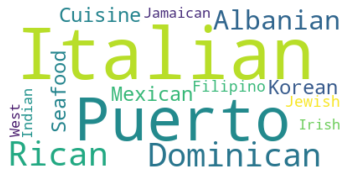

<Figure size 2160x3240 with 0 Axes>

In [69]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

##### Most Preferred Food in The Bronx is - 

1. Italian
2. Puerto Rican
3. Albanian
4. Dominican